In [84]:
import numpy as np
import pandas as pd
import os
from os.path import join
import pickle
import sys
from keras.models import load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm
import seaborn as sn

In [22]:
def flattenFeatures(x):
    x_flat = []
    for xi in x:
        xi_flat = xi.flatten()
        x_flat.append(xi_flat)
    x_flat = np.array(x_flat)
    return x_flat

classMap = {
    "NORMAL": 0,
    "DRUSEN": 1,
    "CNV": 2,
    "DME": 3}

classMapR = {i:lbl for lbl, i in classMap.items()}

In [2]:
thisPath = os.getcwd()
os.chdir("../../code")
projectDir = os.getcwd()
from evalUtils import plotModelHist, UrgentVRoutne, reportBinaryScores

In [18]:
yTestPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224x224\targetData_(224, 224, 3)_test.npy"
yTrueTest = np.load(yTestPath)

yTrnPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224x224\targetData_(224, 224, 3)_train.npy"
yTrueTrn = np.load(yTrnPath)

yValPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\224x224\targetData_(224, 224, 3)_val.npy"
yTrueVal = np.load(yValPath)

In [42]:
modelsPath = r"D:\Projects\OCT-Image-Classification\modelOutput\featureExtraction"
modelNames = ["VGG16", "ResNet50", "InceptionV3", "Xception"]
featuresDict = {}
datasets = ["trn", "test", "val"]

for modelName in modelNames:
    print(modelName)
    featuresDict[modelName] = {}
    modelDir = join(modelsPath, modelName)
    for dset in datasets:
        print('\t', dset)
        fName = "{}_features_{}.npy".format(modelName, dset)
        featuresArray = np.load(join(modelDir, fName))
        featuresDict[modelName][dset] = featuresArray


VGG16
trn
test
val
ResNet50
trn
test
val
InceptionV3
trn
test
val
Xception
trn
test
val


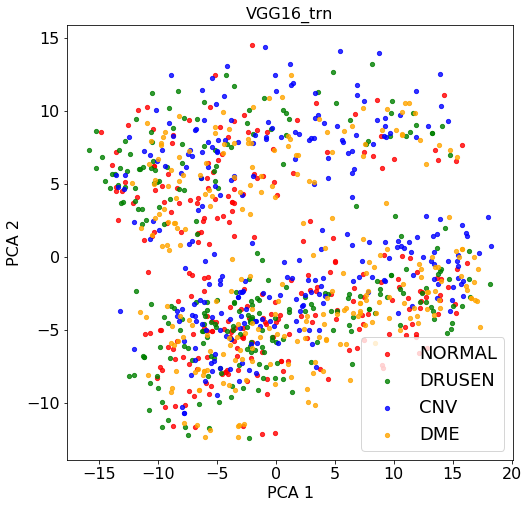

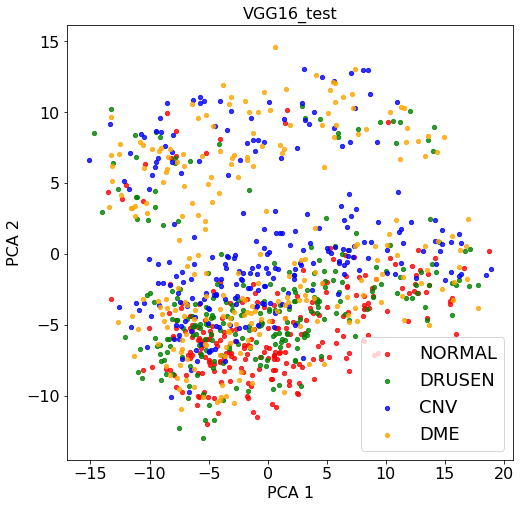

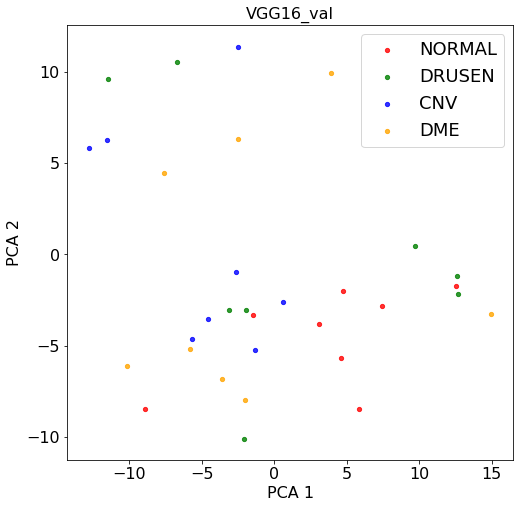

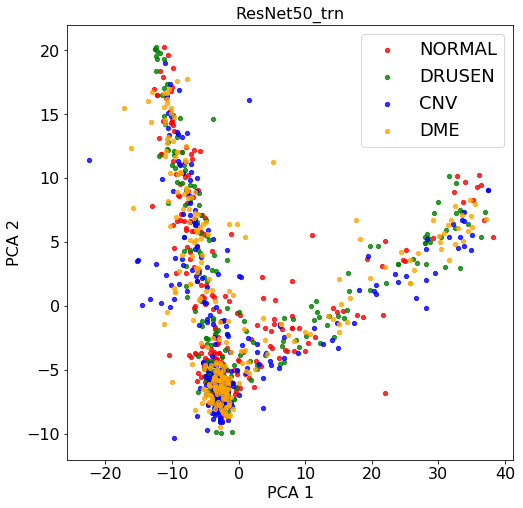

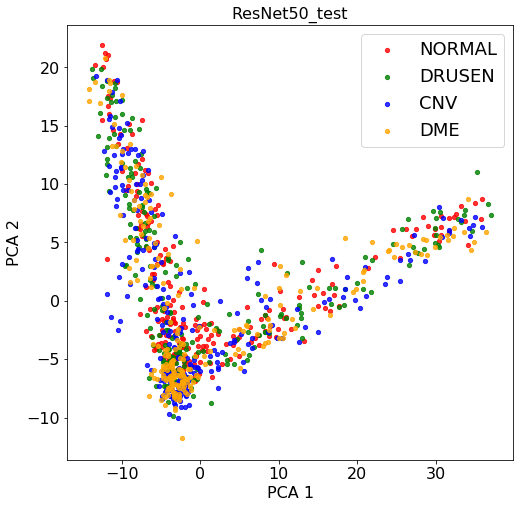

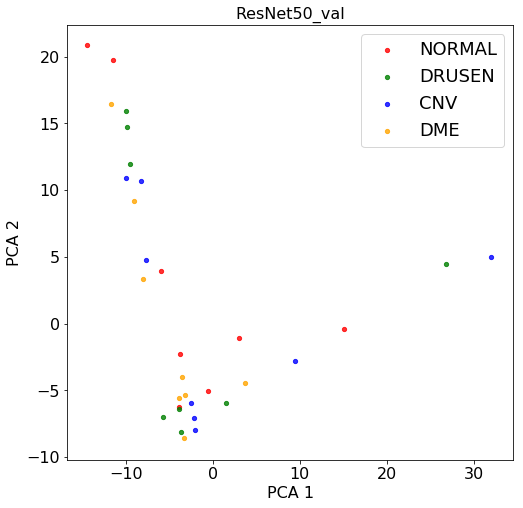

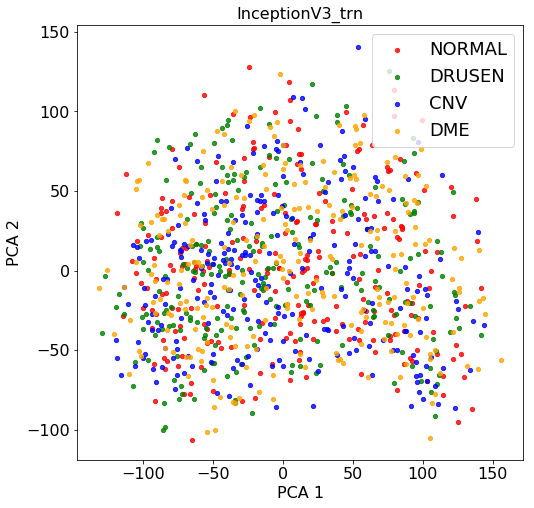

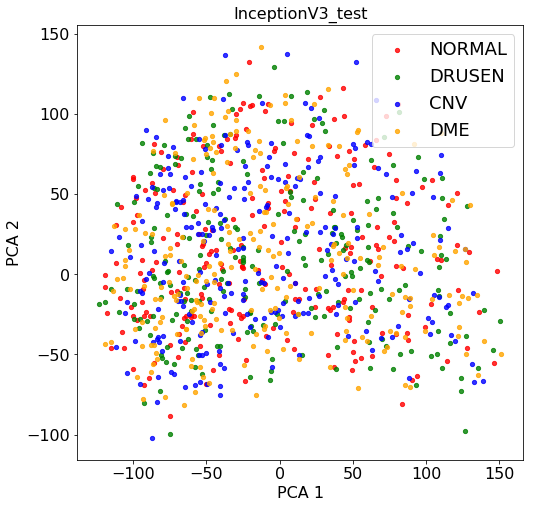

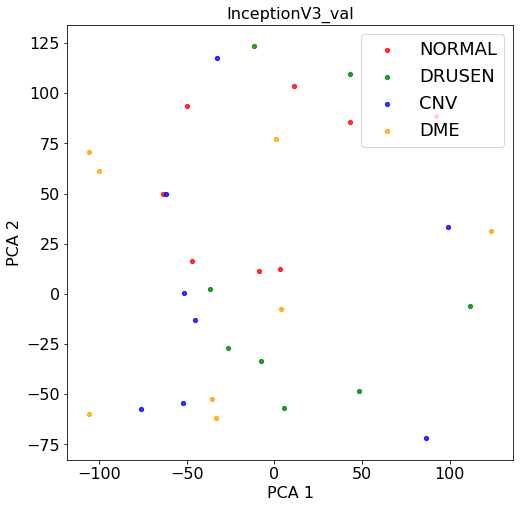

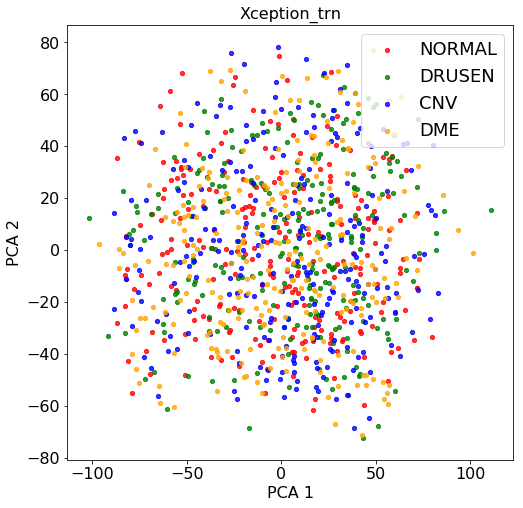

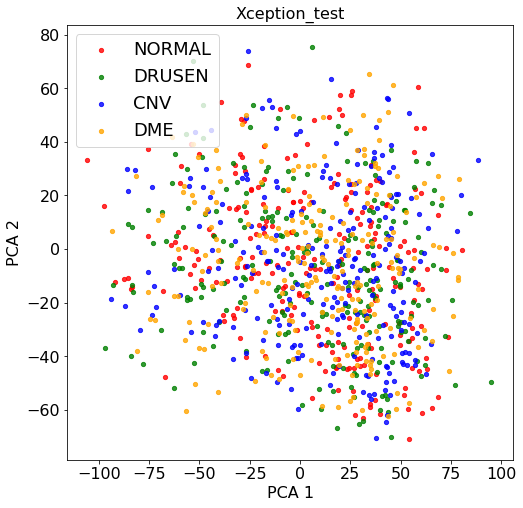

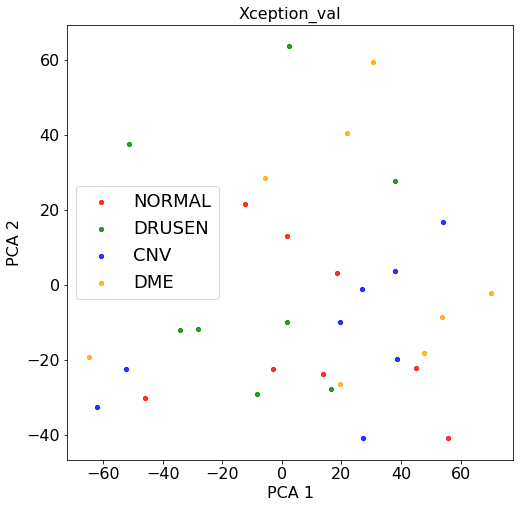

In [67]:
# flatten 4 class
fs = 16
tickSize=16
colours = ['r', 'g', 'b', 'orange']
datasets = ["trn", "test", "val"]

n_components = 2
yTrueDict = {"trn": yTrueTrn, 
             "test": yTrueTest, 
             "val": yTrueVal}


for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        features = featuresDict[modelName][dset]
        features_flat = flattenFeatures(features)
        if dset == 'trn':
            pca = PCA(n_components=n_components).fit(features_flat)
        features_pca = pca.transform(features_flat)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            pca1 = features_pca[idx, 0]
            pca2 = features_pca[idx, 1]
            plt.scatter(pca1, pca2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=classMapR[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('PCA 1', fontsize=fs)
        plt.ylabel('PCA 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca

(1000, 25088)


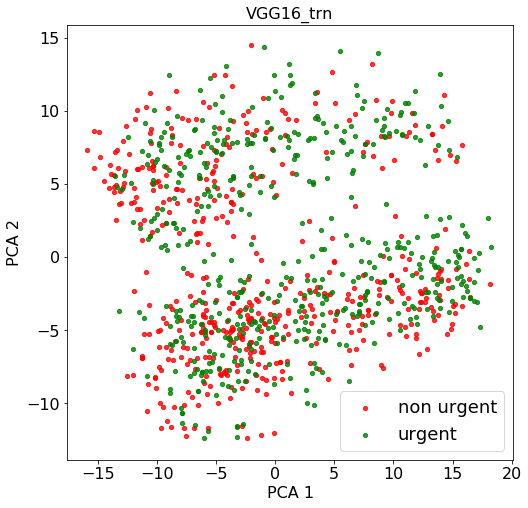

(968, 25088)


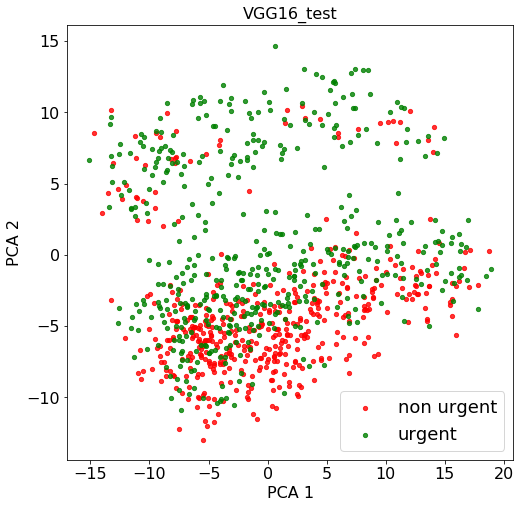

(32, 25088)


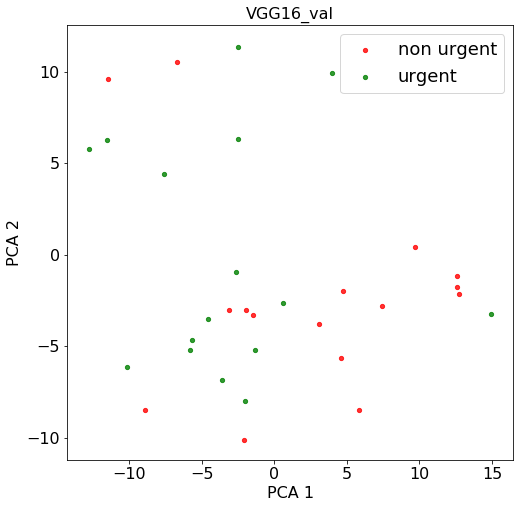

(1000, 100352)


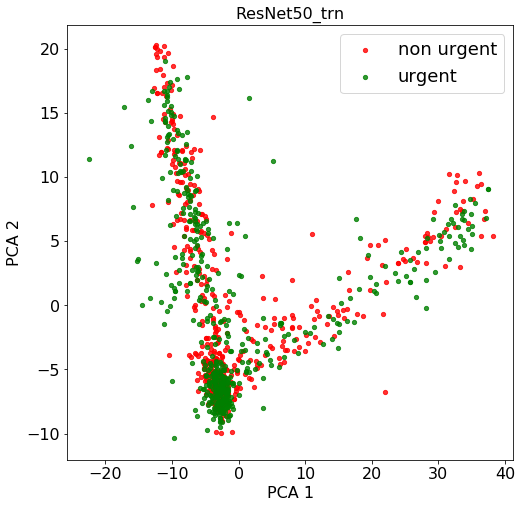

(968, 100352)


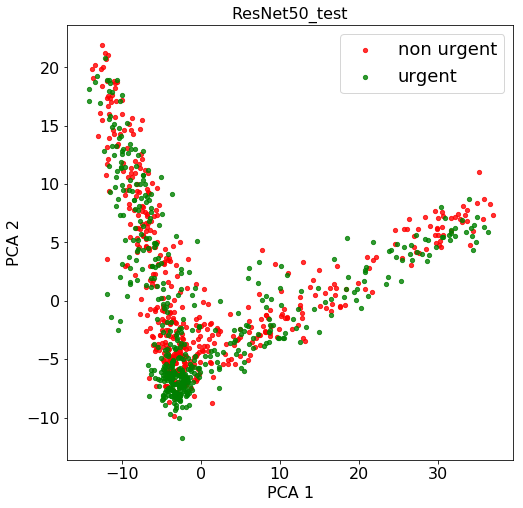

(32, 100352)


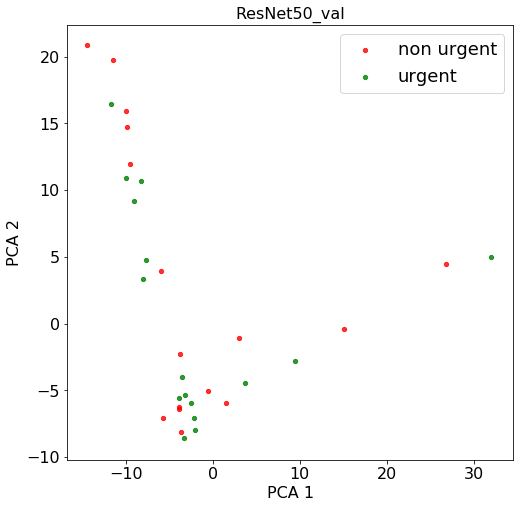

(1000, 131072)


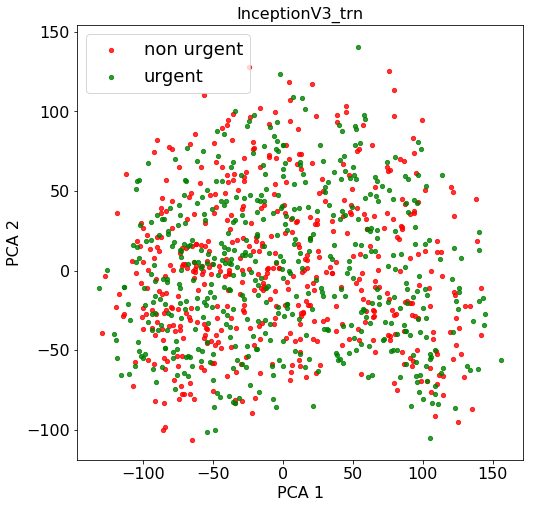

(968, 131072)


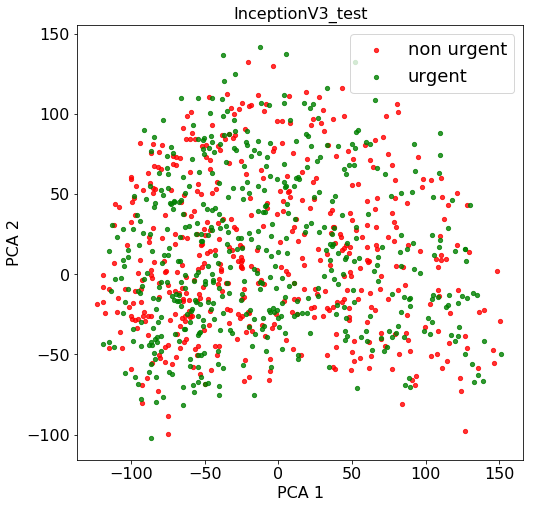

(32, 131072)


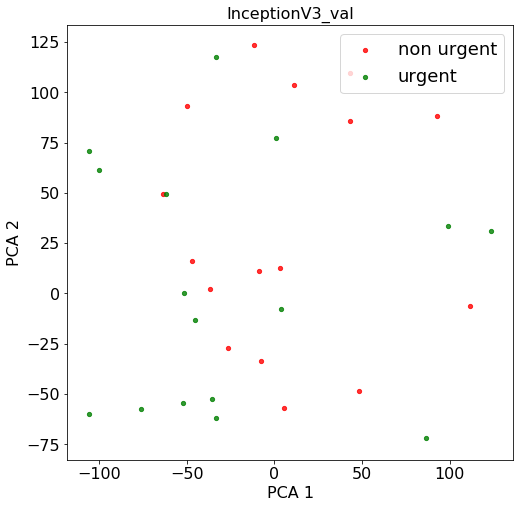

(1000, 204800)


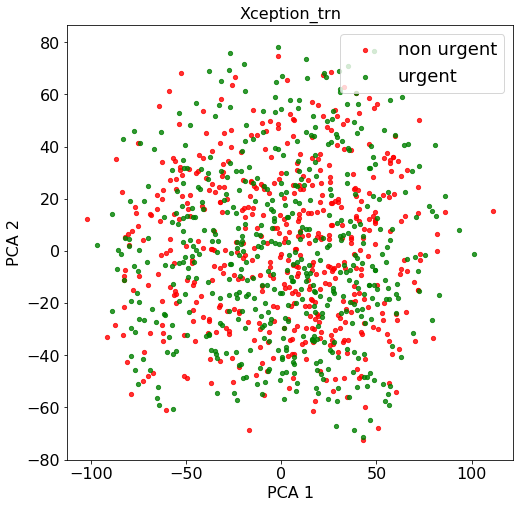

(968, 204800)


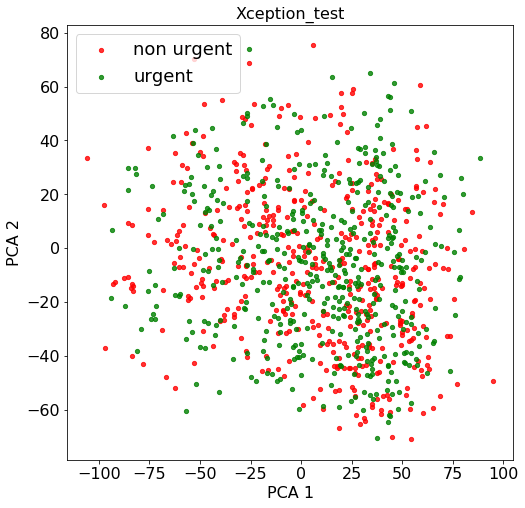

(32, 204800)


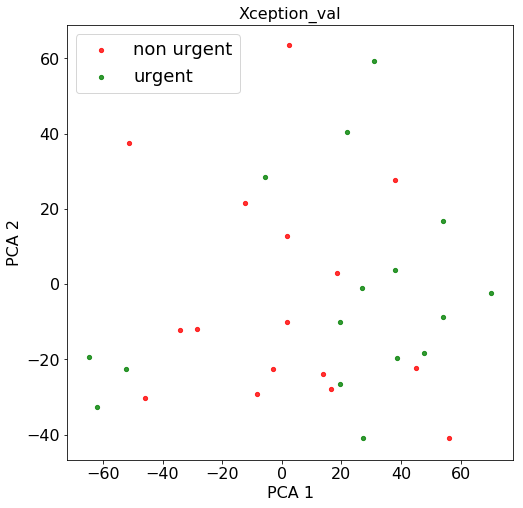

In [71]:
# flatten binary
urgentLbls = ['non urgent', 'urgent']
for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        yTrue1Hot = to_categorical(yTrue)
        yTrue = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)

        features = featuresDict[modelName][dset]
        features_flat = flattenFeatures(features)
        print(features_flat.shape)
        if dset == 'trn':
            pca = PCA(n_components=n_components).fit(features_flat)
        features_pca = pca.transform(features_flat)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            pca1 = features_pca[idx, 0]
            pca2 = features_pca[idx, 1]
            plt.scatter(pca1, pca2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=urgentLbls[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('PCA 1', fontsize=fs)
        plt.ylabel('PCA 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca

pca fitting


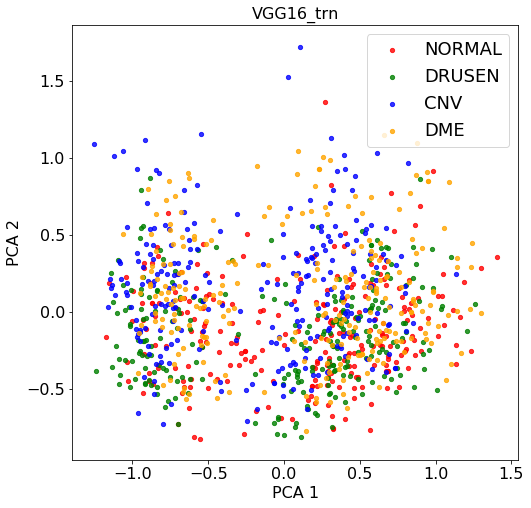

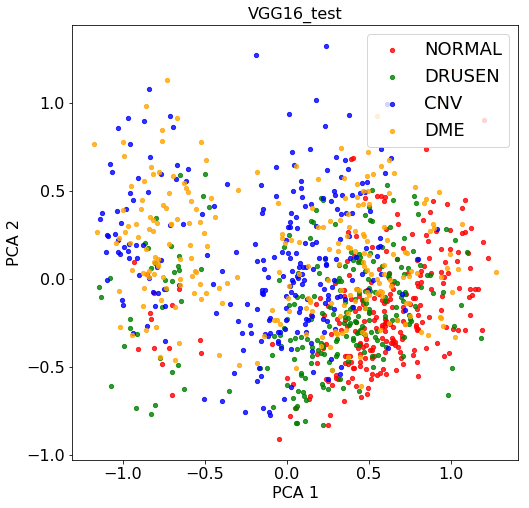

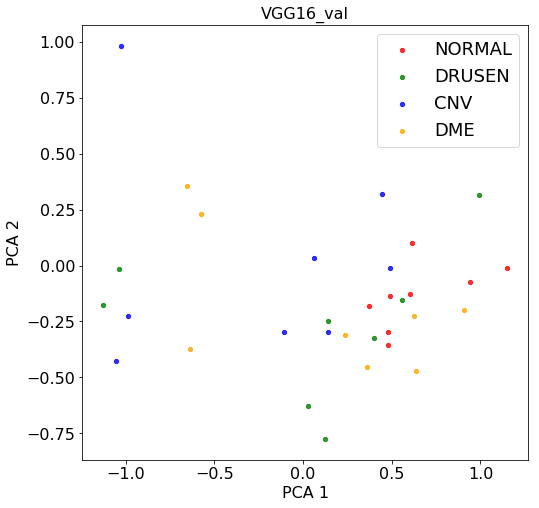

pca fitting


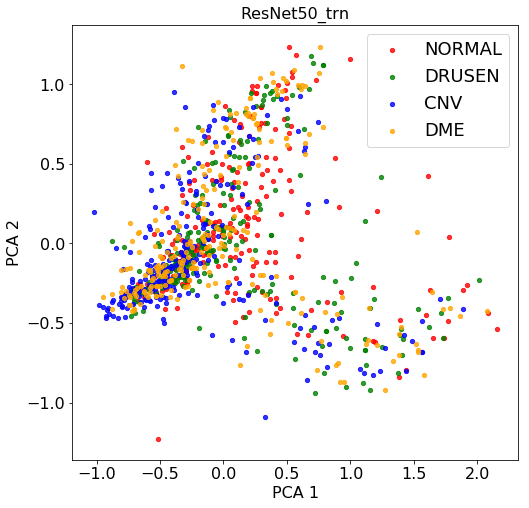

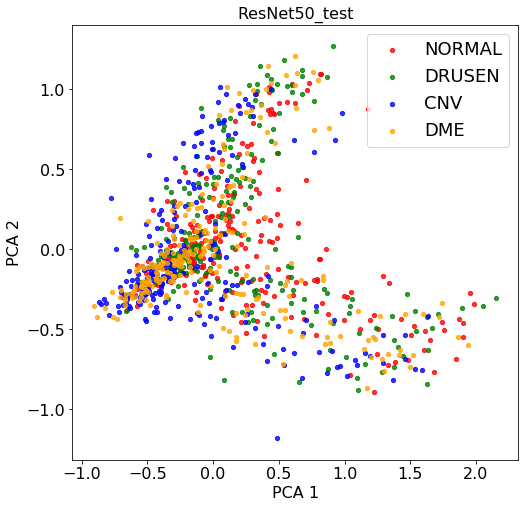

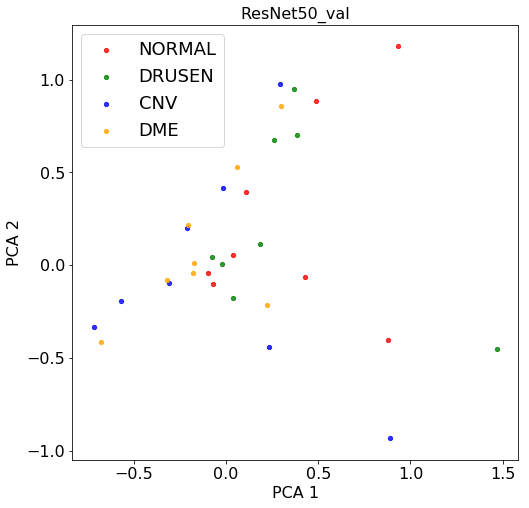

pca fitting


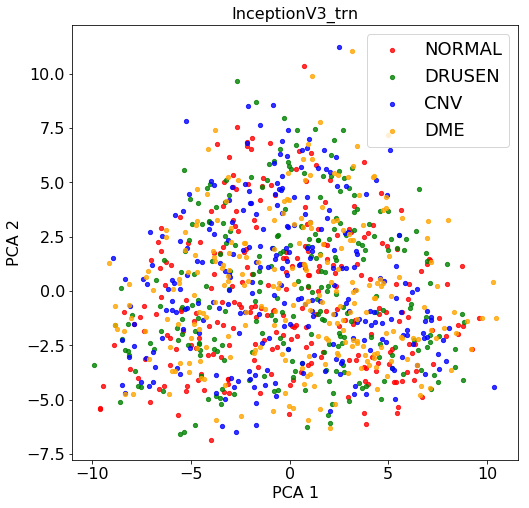

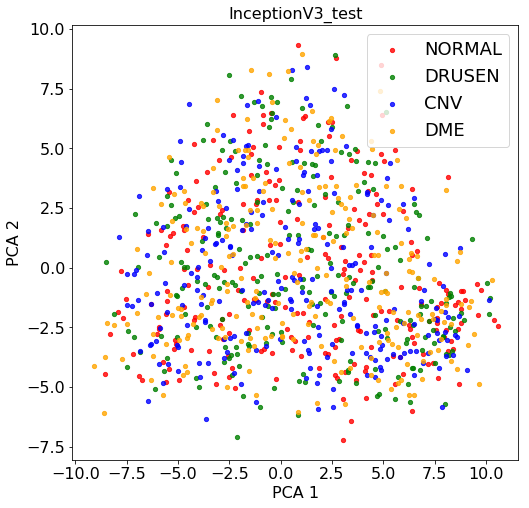

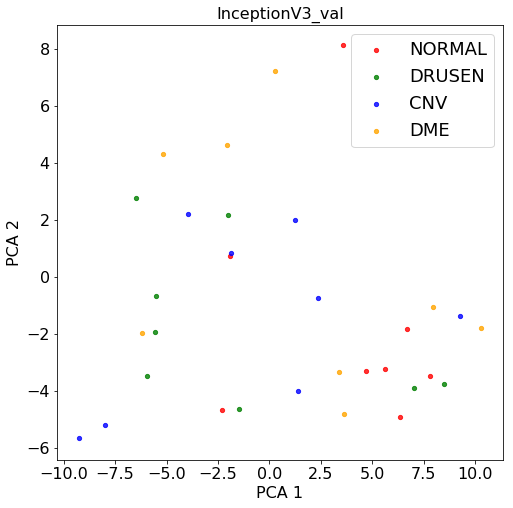

pca fitting


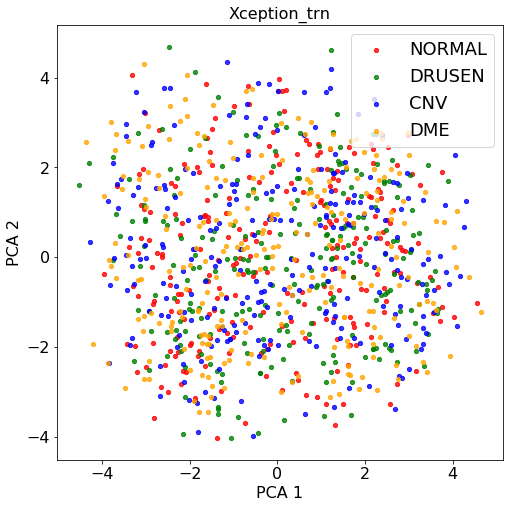

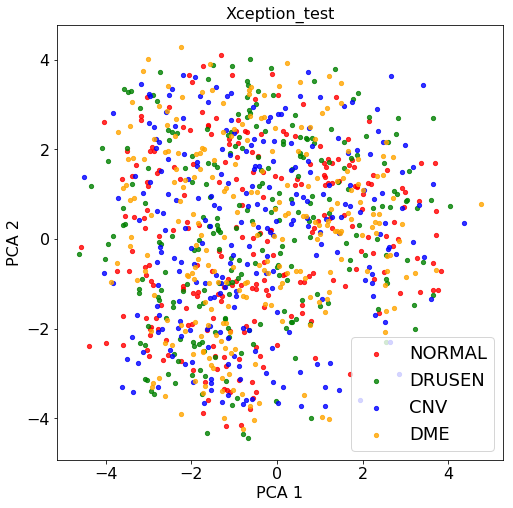

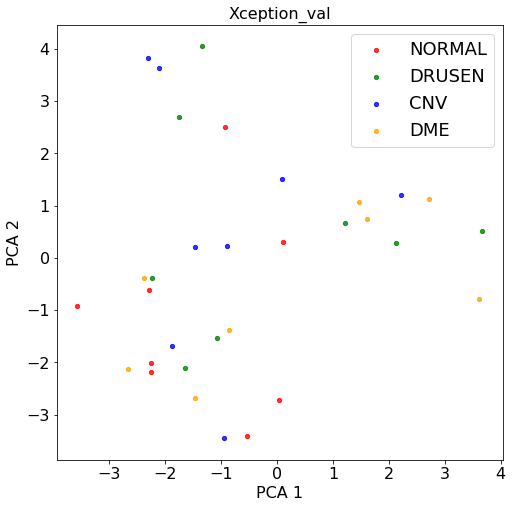

In [72]:
# mean 4 class

for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        features = featuresDict[modelName][dset]
        features_mean = features.mean(axis=(1, 2))
        if dset == 'trn': 
            print('pca fitting')
            pca = PCA(n_components=n_components).fit(features_mean)
        features_pca = pca.transform(features_mean)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            pca1 = features_pca[idx, 0]
            pca2 = features_pca[idx, 1]
            plt.scatter(pca1, pca2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=classMapR[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('PCA 1', fontsize=fs)
        plt.ylabel('PCA 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca

(1000, 512)


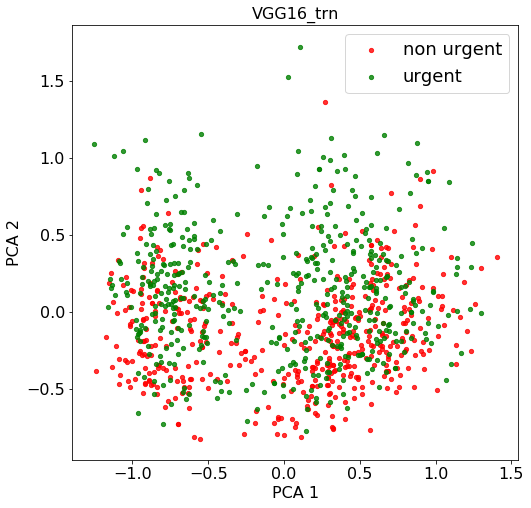

(968, 512)


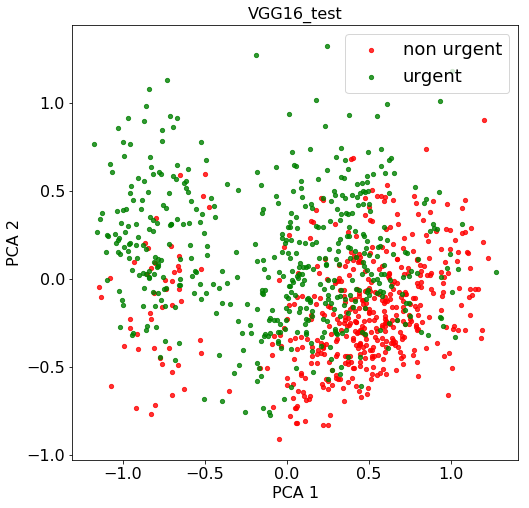

(32, 512)


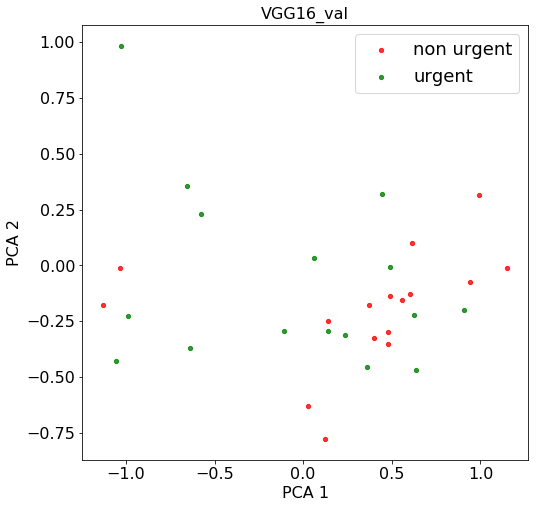

(1000, 2048)


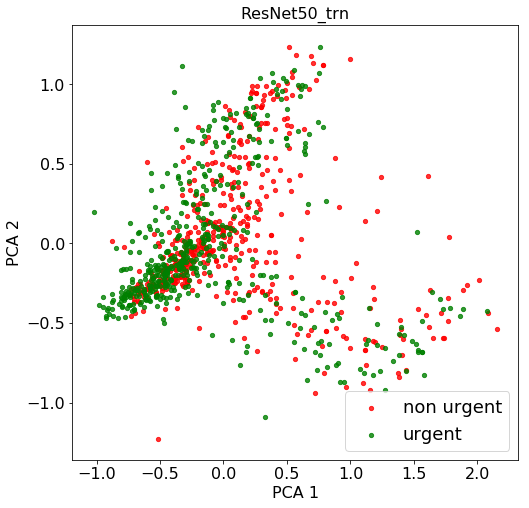

(968, 2048)


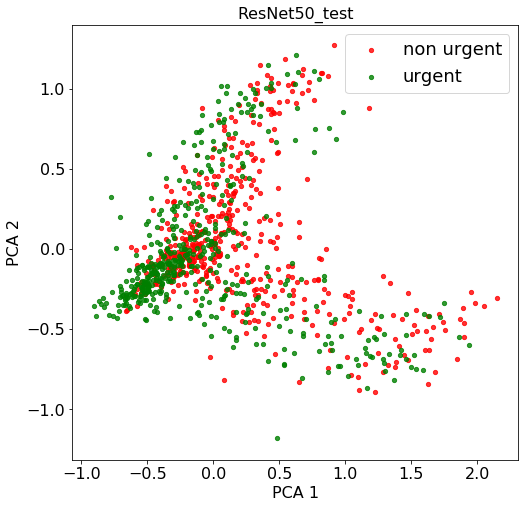

(32, 2048)


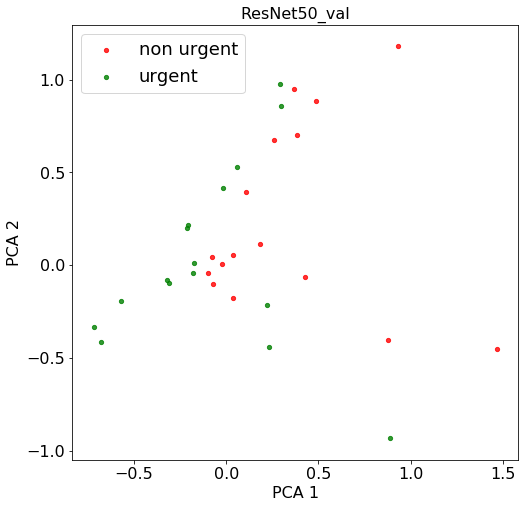

(1000, 2048)


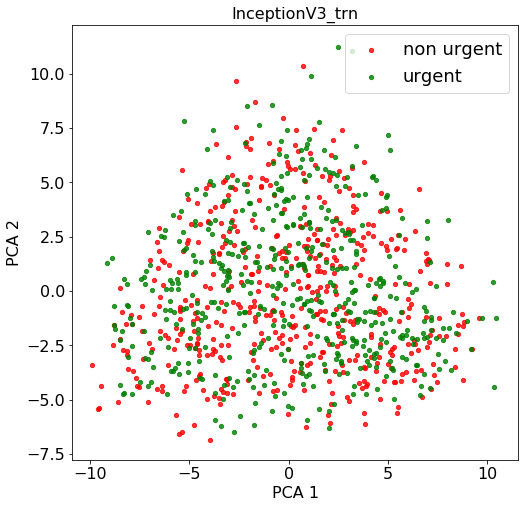

(968, 2048)


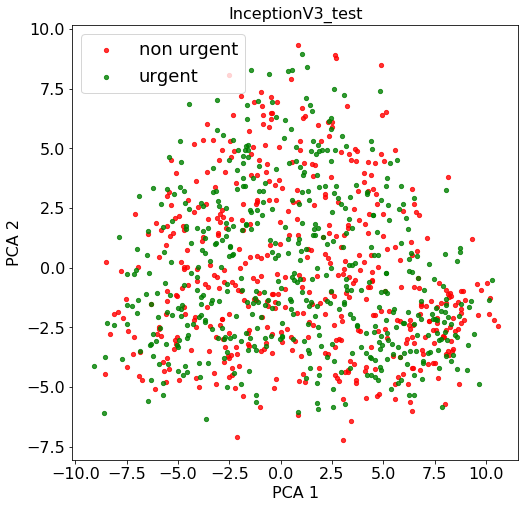

(32, 2048)


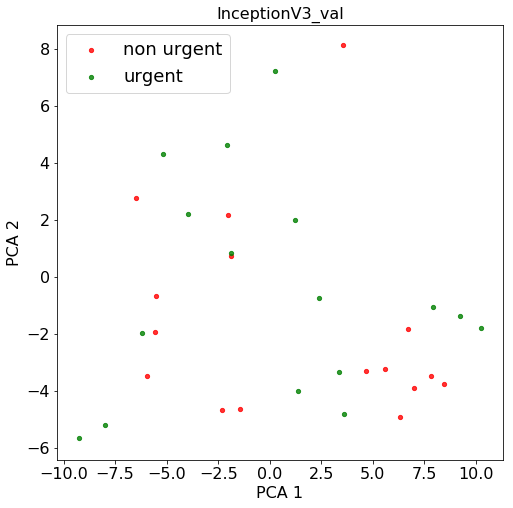

(1000, 2048)


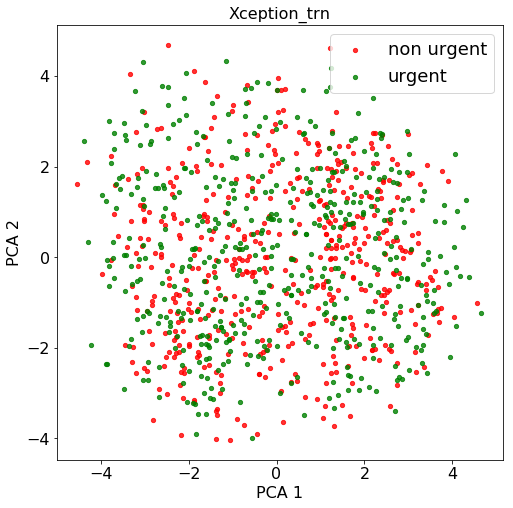

(968, 2048)


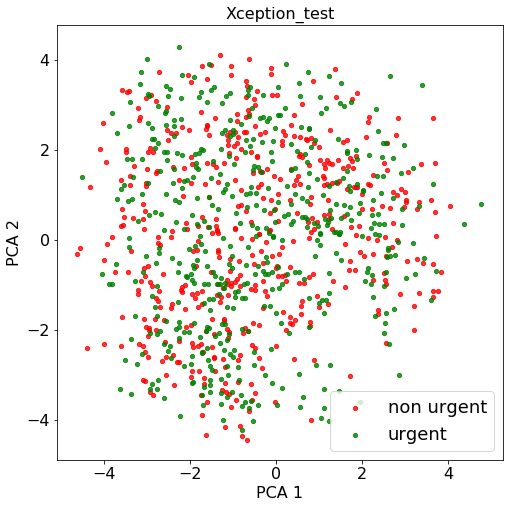

(32, 2048)


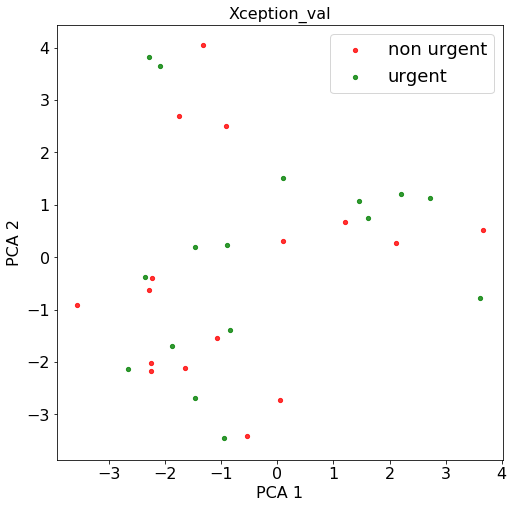

In [80]:
# mean binary

for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        yTrue1Hot = to_categorical(yTrue)
        yTrue = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)
        
        features = featuresDict[modelName][dset]
        features_mean = features.mean(axis=(1, 2))
        print(features_mean.shape)
        if dset == 'trn':
            pca = PCA(n_components=n_components).fit(features_mean)
        features_pca = pca.transform(features_mean)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            pca1 = features_pca[idx, 0]
            pca2 = features_pca[idx, 1]
            plt.scatter(pca1, pca2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=urgentLbls[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('PCA 1', fontsize=fs)
        plt.ylabel('PCA 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca

(1000, 512)


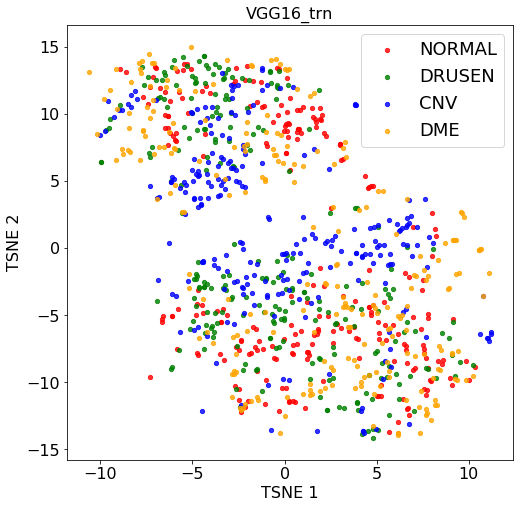

(968, 512)


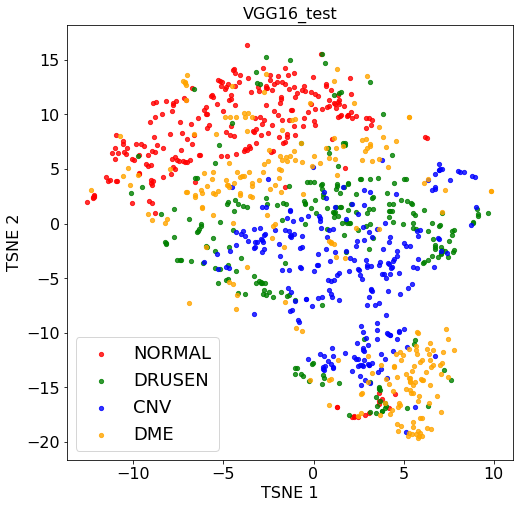

(32, 512)


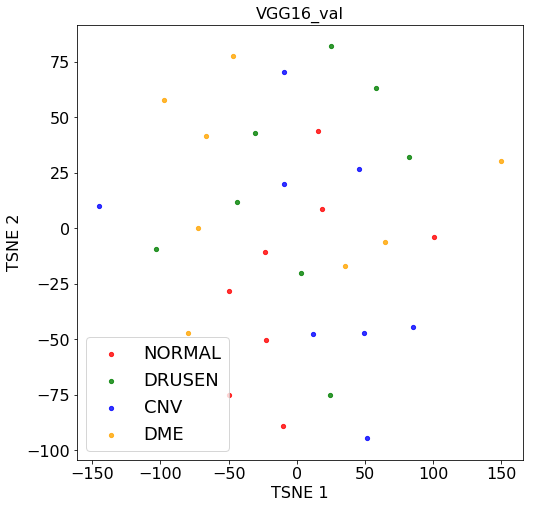

(1000, 2048)


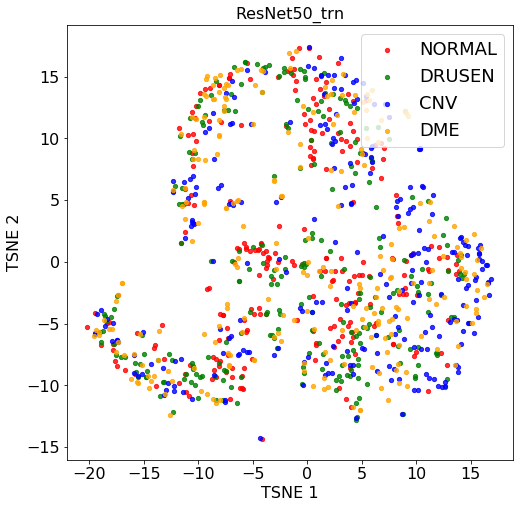

(968, 2048)


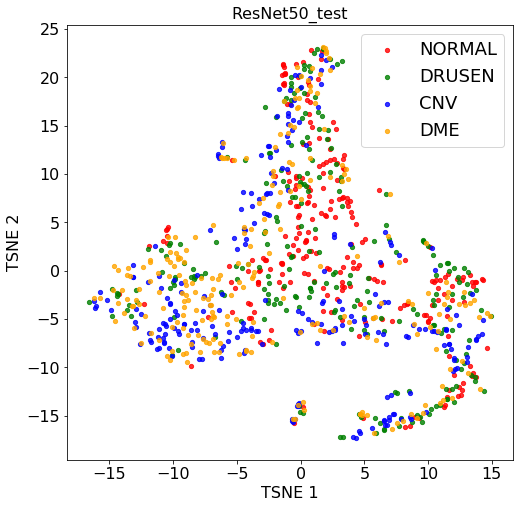

(32, 2048)


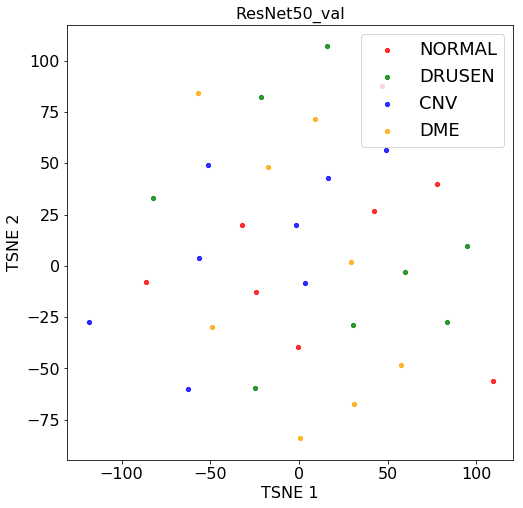

(1000, 2048)


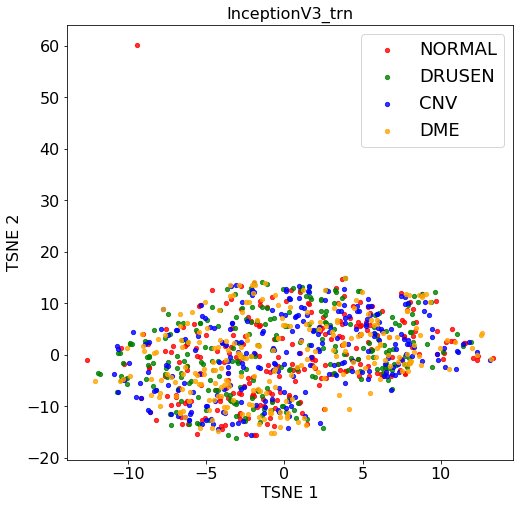

(968, 2048)


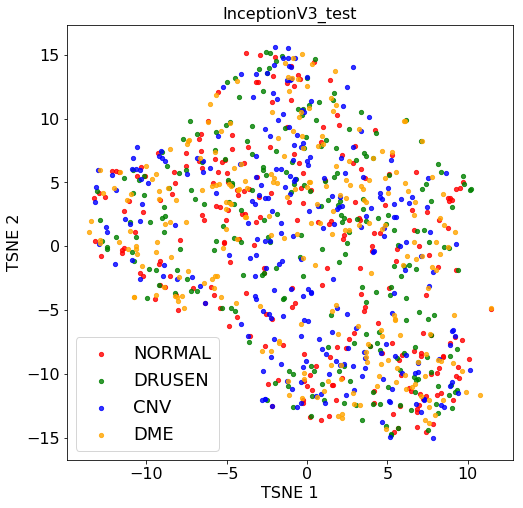

(32, 2048)


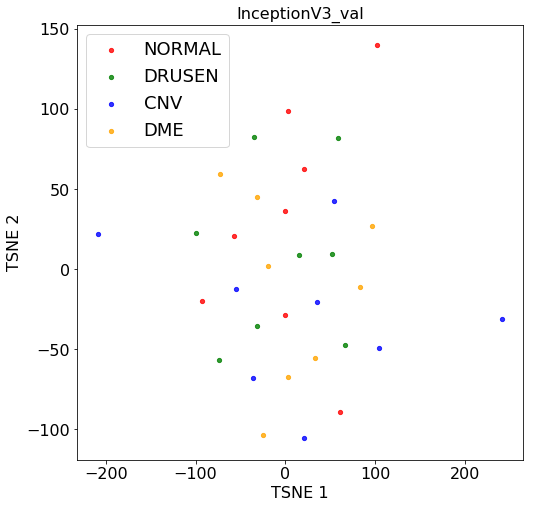

(1000, 2048)


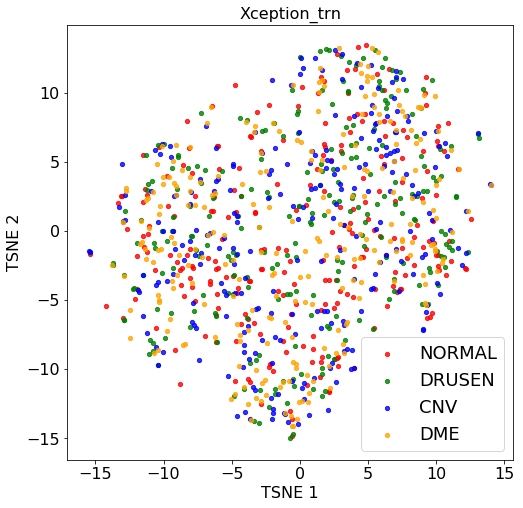

(968, 2048)


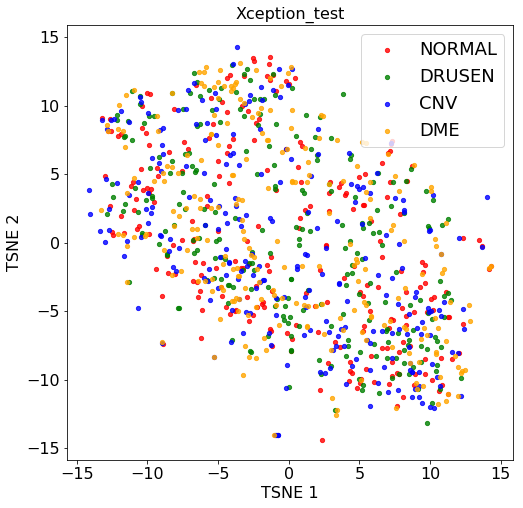

(32, 2048)


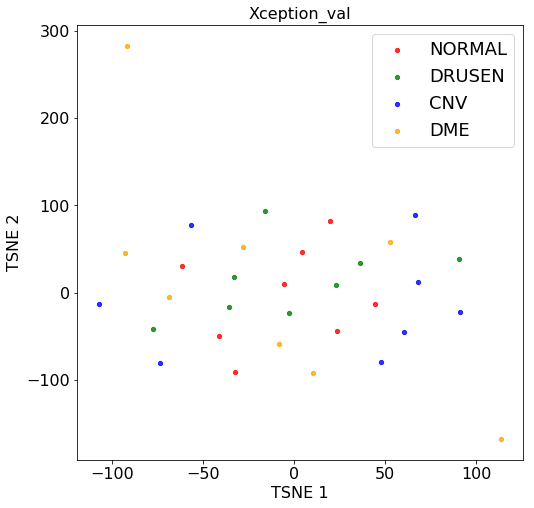

In [82]:
# mean 4 class tsne

for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        #yTrue1Hot = to_categorical(yTrue)
        #yTrue = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)
        
        features = featuresDict[modelName][dset]
        features_mean = features.mean(axis=(1, 2))
        print(features_mean.shape)
        if dset == 'trn':
            pca = PCA(n_components=50).fit(features_mean)
        features_pca = pca.transform(features_mean)
        features_tsne = TSNE(n_components=2, perplexity=40, n_iter=300).fit_transform(features_pca)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            x1 = features_tsne[idx, 0]
            x2 = features_tsne[idx, 1]
            plt.scatter(x1, x2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=classMapR[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('TSNE 1', fontsize=fs)
        plt.ylabel('TSNE 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca, features_tsne

(1000, 512)


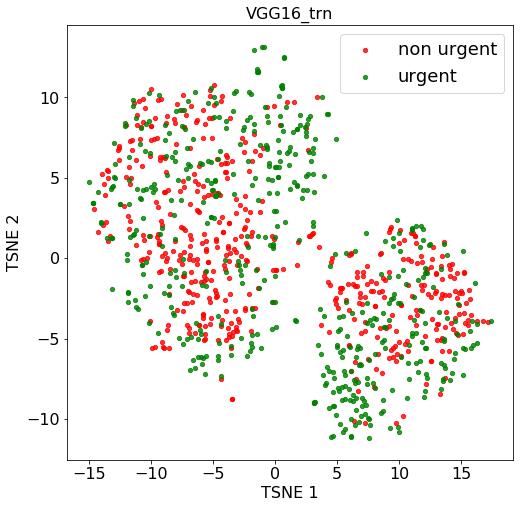

(968, 512)


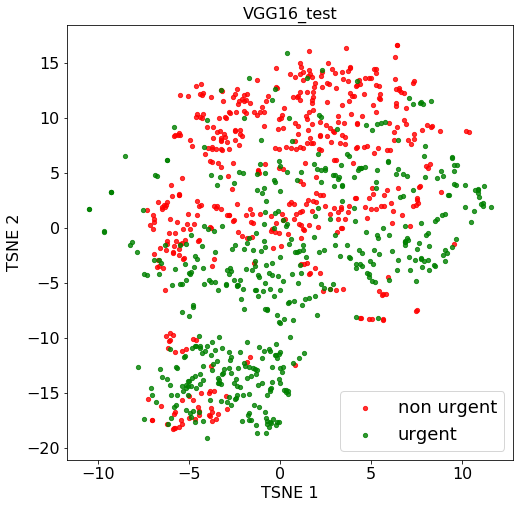

(32, 512)


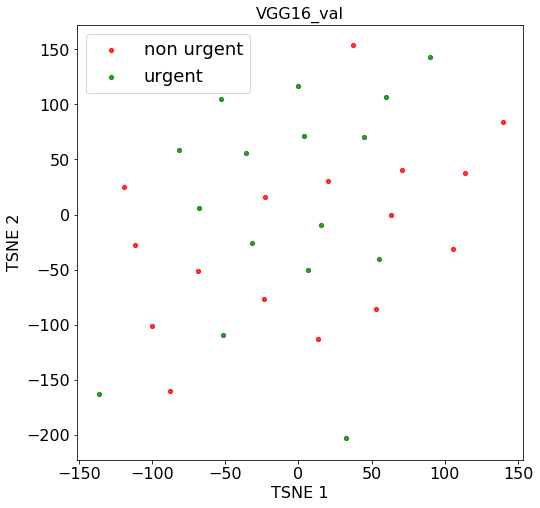

(1000, 2048)


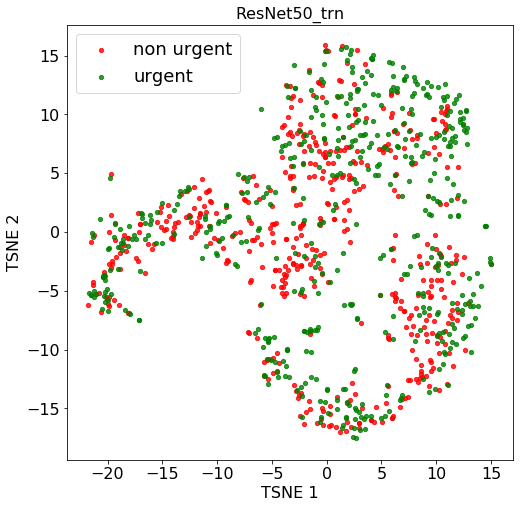

(968, 2048)


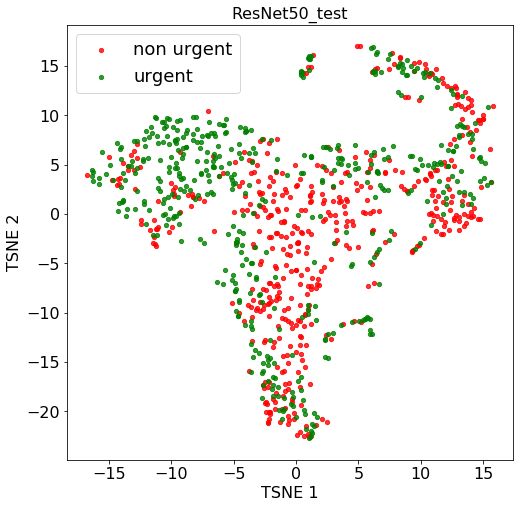

(32, 2048)


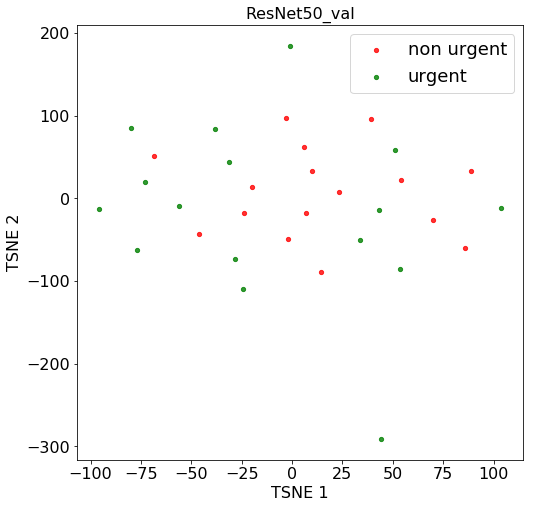

(1000, 2048)


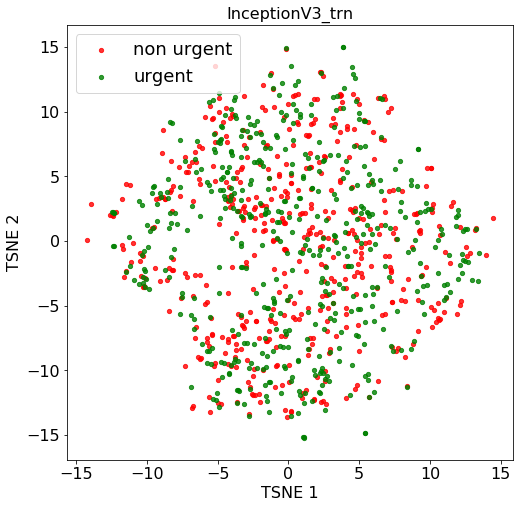

(968, 2048)


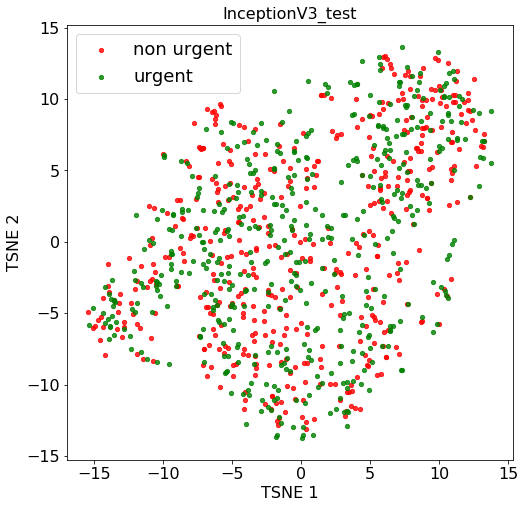

(32, 2048)


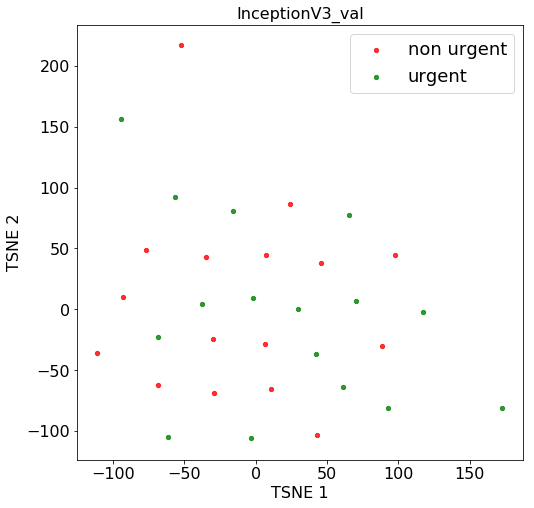

(1000, 2048)


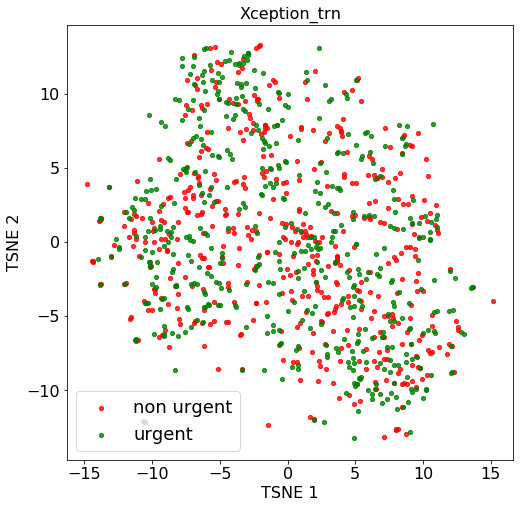

(968, 2048)


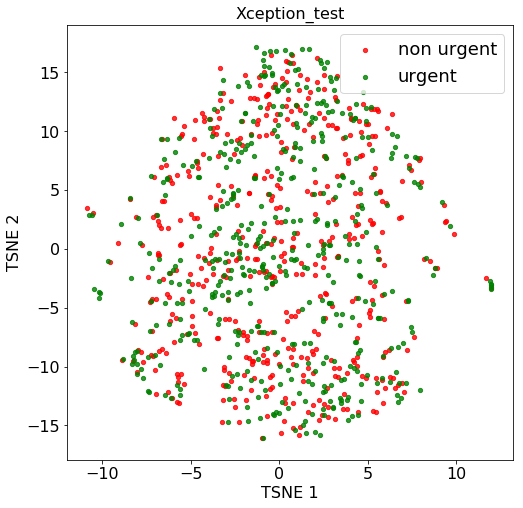

(32, 2048)


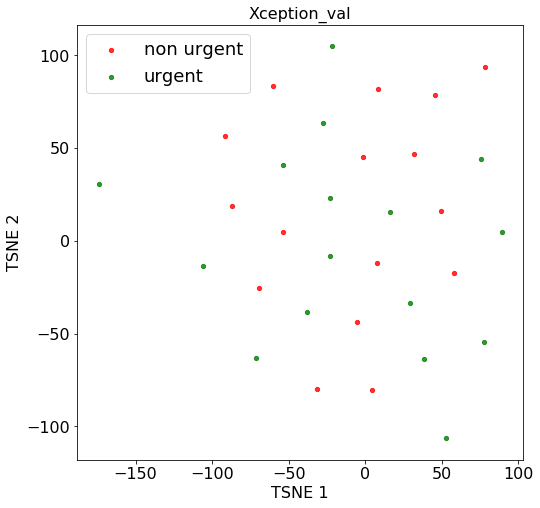

In [83]:
# mean 2 class tsne

for modelName in modelNames:
    for i, dset in enumerate(datasets):
        yTrue = yTrueDict[dset]
        yTrue1Hot = to_categorical(yTrue)
        yTrue = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)
        
        features = featuresDict[modelName][dset]
        features_mean = features.mean(axis=(1, 2))
        print(features_mean.shape)
        if dset == 'trn':
            pca = PCA(n_components=50).fit(features_mean)
        features_pca = pca.transform(features_mean)
        features_tsne = TSNE(n_components=2, perplexity=40, n_iter=300).fit_transform(features_pca)
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrue):
            idx = np.where(yTrue==lbl) 
            x1 = features_tsne[idx, 0]
            x2 = features_tsne[idx, 1]
            plt.scatter(x1, x2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=urgentLbls[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('TSNE 1', fontsize=fs)
        plt.ylabel('TSNE 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    del pca, features_tsne

VGG16
	 trn
	 accuracy: 0.784
	 sensitivity 0.754
	 specificity 0.814
	 positive likelihood ratio 4.05
	 negative likelihood ratio 0.302


	 auc 0.8721679999999999


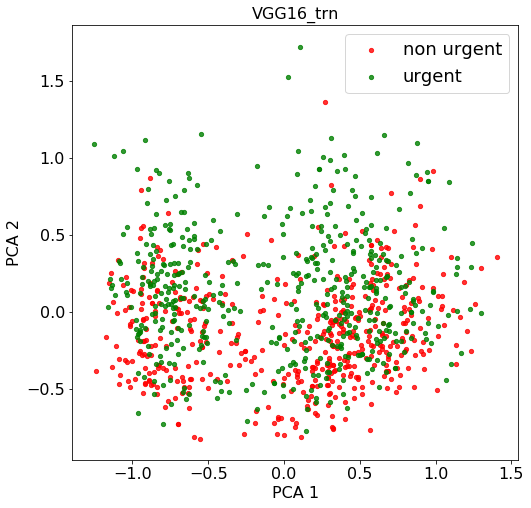

	 test
	 accuracy: 0.843
	 sensitivity 0.853
	 specificity 0.833
	 positive likelihood ratio 5.1
	 negative likelihood ratio 0.176


	 auc 0.9206338364865788


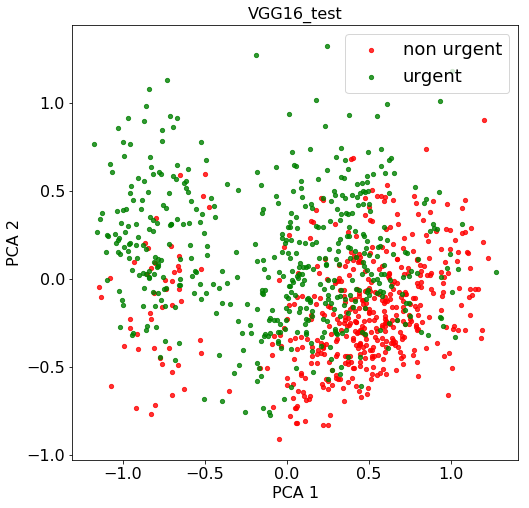

	 val
	 accuracy: 0.719
	 sensitivity 0.625
	 specificity 0.812
	 positive likelihood ratio 3.33
	 negative likelihood ratio 0.462


	 auc 0.87890625


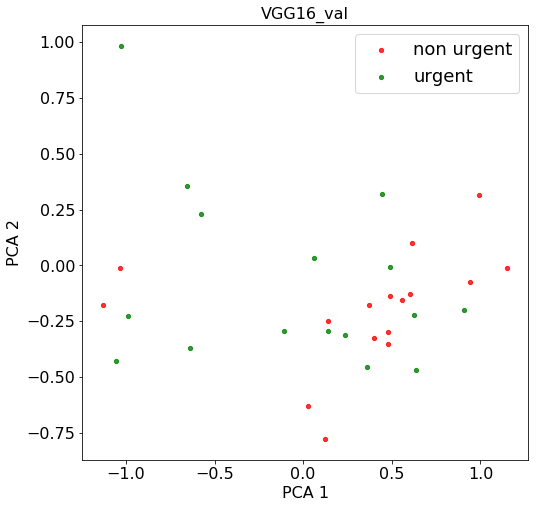

ResNet50
	 trn
	 accuracy: 0.723
	 sensitivity 0.7
	 specificity 0.746
	 positive likelihood ratio 2.76
	 negative likelihood ratio 0.402


	 auc 0.786316


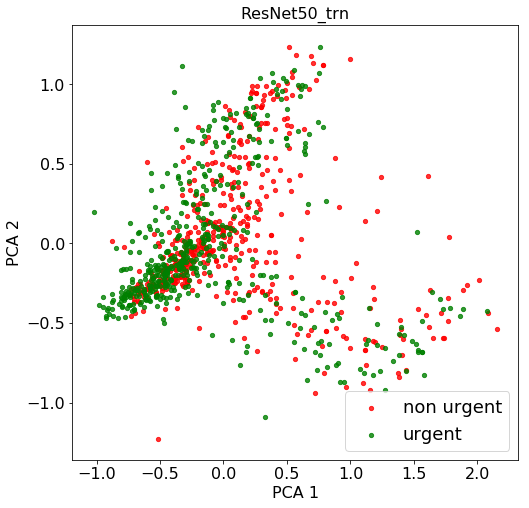

	 test
	 accuracy: 0.785
	 sensitivity 0.723
	 specificity 0.847
	 positive likelihood ratio 4.73
	 negative likelihood ratio 0.327


	 auc 0.8637452189058125


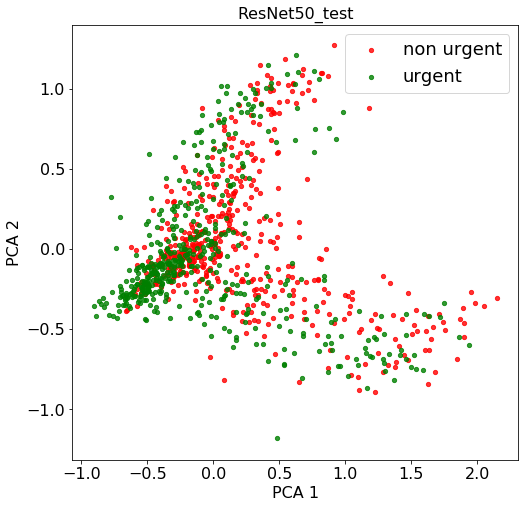

	 val
	 accuracy: 0.75
	 sensitivity 0.625
	 specificity 0.875
	 positive likelihood ratio 5
	 negative likelihood ratio 0.429


	 auc 0.84375


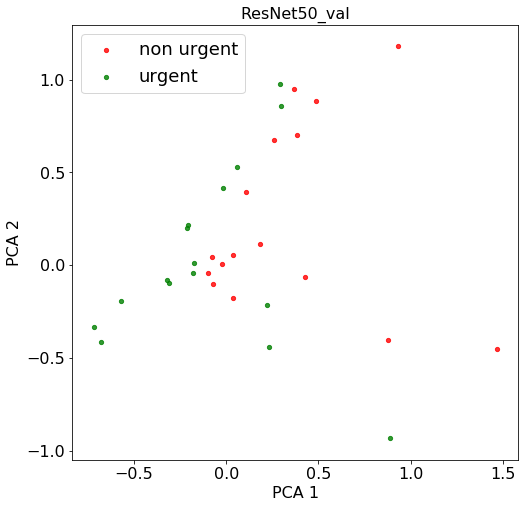

InceptionV3
	 trn
	 accuracy: 0.004
	 sensitivity 0
	 specificity 0.008
	 positive likelihood ratio 0
	 negative likelihood ratio 125


	 auc 3.000000000000003e-05


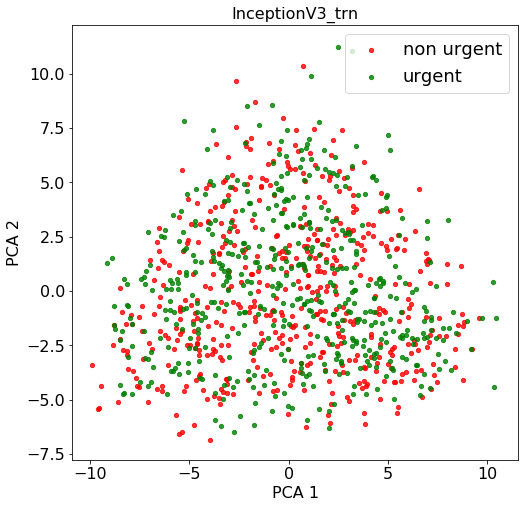

	 test
	 accuracy: 0.486
	 sensitivity 0.231
	 specificity 0.74
	 positive likelihood ratio 0.889
	 negative likelihood ratio 1.04


	 auc 0.47501451403592654


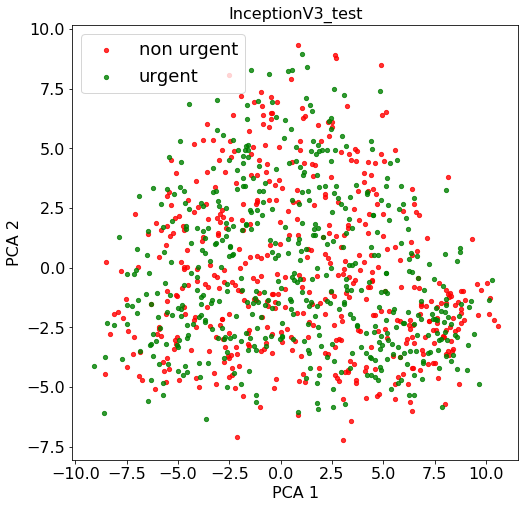

	 val
	 accuracy: 0.562
	 sensitivity 0.25
	 specificity 0.875
	 positive likelihood ratio 2
	 negative likelihood ratio 0.857


	 auc 0.51171875


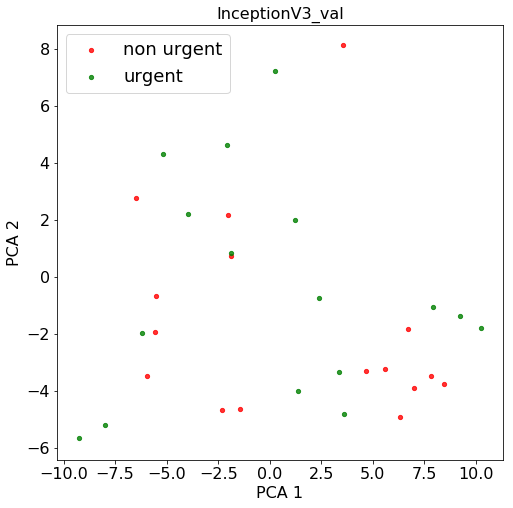

Xception
	 trn


In [ ]:
# mean binary svm

C = 1.0
Ker = 'rbf'


for modelName in modelNames:
    print(modelName)
    for i, dset in enumerate(datasets):
        print('\t', dset)
        yTrue = yTrueDict[dset]
        yTrue1Hot = to_categorical(yTrue)
        yTrueBin = UrgentVRoutne(yTrue1Hot, classMap).astype(np.int)
        
        features = featuresDict[modelName][dset]
        features_mean = features.mean(axis=(1, 2))
        if dset == 'trn':
            pca = PCA(n_components=20, ).fit(features_mean, )
        features_pca = pca.transform(features_mean)
        if dset == 'trn':
            clf = svm.SVC(C=C, kernel=Ker, probability=True)
            clf.fit(features_pca, yTrueBin)
        yPred = clf.predict_proba(features_pca)
        #yPredBin = UrgentVRoutne(yPred, classMap).astype(np.int)
        scores = reportBinaryScores(yTrueBin, yPred[:, 1], v=1)
        acc, tpr, tnr, plr, nlr = scores
        fprs, tprs, _ = roc_curve(yTrueBin, yPred[:, 1],)
        aucUrgent = auc(fprs, tprs)
        print('\t auc {}'.format(aucUrgent))
        
        fig=plt.figure(figsize=(8, 8))
        for lbl in np.unique(yTrueBin):
            idx = np.where(yTrueBin==lbl) 
            pca1 = features_pca[idx, 0]
            pca2 = features_pca[idx, 1]
            plt.scatter(pca1, pca2, color=colours[lbl], 
                    s=18, alpha = 0.8, label=urgentLbls[lbl])
        plt.title(modelName + '_' + dset, fontsize=fs)
        plt.xlabel('PCA 1', fontsize=fs)
        plt.ylabel('PCA 2', fontsize=fs)
        plt.tick_params(axis='both', labelsize=tickSize)
        plt.legend(prop={'size': 18})
        plt.show()
    #del pca, clf